In [0]:
# Kirby Leo, kleo1@jhu.edu, krbyktl

#Question 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
## this sets some style parameters
sns.set()

! if [ ! -e orings.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("orings.csv")


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14.861927086730814, -0.22950051284078993]
The estimated probability of failure is 0.10706
[[0.89293817 0.10706183]]
The estimated probability of failure is 0.10706


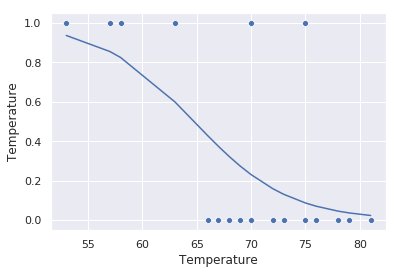

In [123]:
t1 = []
tot = []
for i in range(len(dat['Total'])):
  t1.append(dat['Temperature'][i])
  if dat['Total'][i] > 0:
    tot.append(1)
  else:
    tot.append(0)
     
dat1 = pd.DataFrame(list(zip(t1,tot)),columns = ['Temperature', 'Total'])  
sns.scatterplot('Temperature', 'Total', data = dat1)

x = dat1['Temperature']
y = dat1['Total']

regress = lm.LogisticRegression(solver = 'lbfgs').fit(x.values.reshape(-1,1),y.values.reshape(-1,1))

beta0, beta1 = [regress.intercept_[0], regress.coef_[0][0]]
[beta0, beta1]
print([beta0, beta1])

eta = beta0 + beta1 * x
p = 1 / (1 + np.exp(-eta))

sns.lineplot(x, p)

#hardcoded version
def p(x_new):
  eta = beta0 + beta1 * x_new
  p = 1 / (1 + np.exp(-eta))
  return p
print('The estimated probability of failure is %.5f' %(p(74)))

#using classes
x_new = 74
ypred = regress.predict_proba(np.asarray(x_new).reshape(-1,1))
print(ypred)
print('The estimated probability of failure is %.5f' %(ypred[0][1]))


#Question 2
![alt text](https://github.com/krbyktl/Biomedical-Data-Science/blob/master/IMG_5707.JPG?raw=true)
![alt text](https://github.com/krbyktl/Biomedical-Data-Science/blob/master/IMG_5708.JPG?raw=true)

In [129]:
#Question 3
#retrieved from https://www.kaggle.com/ronitf/heart-disease-uci/version/1

! if [ ! -e heart.csv ]; \
then wget https://raw.githubusercontent.com/krbyktl/Biomedical-Data-Science/master/heart.csv; \
fi;

## Read in the data and display a few rows
heart = pd.read_csv("heart.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
